# 各種データの収集
- 対象国=G7
  - Canada
  - France
  - Germany
  - Italy
  - Japan
  - United Kingdom
  - United States
- 対象データ
  - 人口推移
    - ex: CAN_LP-canada-population-millions
          CAN_LP.csv
    - FRA_LP-france-population-millions
    - DEU_LP-germany-population-millions
    - ITA_LP-italy-population-millions
    - JPN_LP-japan-population-millions
    - GBR_LP-united-kingdom-population-millions
    - USA_LP-united-states-population-millions
  - GDP
    - ex: CAN_NGDP_R-canada-gdp-at-constant-prices-lcu-billions
          CAN_NGDP_R.csv
  - インフレ率
    - ex: JPN_PCPIPCH-japan-inflation-change-average-consumer-prices
          JPN_PCPIPCH.csv
  - 輸出入
    - ex: JPN_TX_RPCH-japan-exports-of-goods-and-services-change
          JPN_TX_RPCH.csv
    - ex: JPN_TM_RPCH-japan-imports-of-goods-and-services-change
          JPN_TM_RPCH.csv
- API Key
  - api_key=

In [162]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

COUNTRIES = {
    # "United States": "USA",
    "Canada": "CAN",
    "France": "FRA",
    "Germany": "DEU",
    "Italy": "ITA",
    "Japan": "JPN",
    "United Kingdom": "GBR",
}
df_population = pd.DataFrame()
df_gdp = pd.DataFrame()
df_gdp_rate = pd.DataFrame()
df_inflation = pd.DataFrame()
df_import = pd.DataFrame()
df_export = pd.DataFrame()

api_key = "LQg7ajNfaVt_1_e-fpxN"

for key, value in COUNTRIES.items():
    df_p = pd.read_csv("https://data.nasdaq.com/api/v3/datasets/ODA/{country}_LP.csv?api_key={api_key}".format(country=value, api_key=api_key),
                     header=0)
    df_g = pd.read_csv("https://data.nasdaq.com/api/v3/datasets/ODA/{country}_NGDP_R.csv?api_key={api_key}".format(country=value, api_key=api_key),
                     header=0)
    df_g_rate = pd.read_csv("https://data.nasdaq.com/api/v3/datasets/ODA/{country}_NGDP_RPCH.csv?api_key={api_key}".format(country=value, api_key=api_key),
                     header=0)
    df_i = pd.read_csv("https://data.nasdaq.com/api/v3/datasets/ODA/{country}_PCPIPCH.csv?api_key={api_key}".format(country=value, api_key=api_key),
                     header=0)
    df_imp = pd.read_csv("https://data.nasdaq.com/api/v3/datasets/ODA/{country}_TM_RPCH.csv?api_key={api_key}".format(country=value, api_key=api_key),
                     header=0)
    df_exp = pd.read_csv("https://data.nasdaq.com/api/v3/datasets/ODA/{country}_TX_RPCH.csv?api_key={api_key}".format(country=value, api_key=api_key),
                     header=0)

    df_p = df_p.rename(columns={'Value': value})
    df_g = df_g.rename(columns={'Value': value})
    df_g_rate = df_g_rate.rename(columns={'Value': value})
    df_i = df_i.rename(columns={'Value': value})
    df_imp = df_imp.rename(columns={'Value': value})
    df_exp = df_exp.rename(columns={'Value': value})
    
    df_p["Date"] = pd.to_datetime(df_p["Date"])
    df_g["Date"] = pd.to_datetime(df_g["Date"])
    df_g_rate["Date"] = pd.to_datetime(df_g_rate["Date"])
    df_i["Date"] = pd.to_datetime(df_i["Date"])
    df_imp["Date"] = pd.to_datetime(df_imp["Date"])
    df_exp["Date"] = pd.to_datetime(df_exp["Date"])
    print("processing")
    if df_population.columns.size < 1:
        df_population = df_p.copy()
        df_gdp        = df_g.copy()
        df_gdp_rate   = df_g_rate.copy()
        df_inflation  = df_i.copy()
        df_import     = df_imp.copy()
        df_export     = df_exp.copy()
    else: 
        df_population = df_population.merge(df_p, on="Date", how="left")
        df_gdp        = df_gdp.merge(df_g, on="Date", how="left")
        df_gdp_rate   = df_gdp_rate.merge(df_g_rate, on="Date", how="left")
        df_inflation  = df_inflation.merge(df_i, on="Date", how="left")
        df_import     = df_import.merge(df_imp, on="Date", how="left")
        df_export     = df_export.merge(df_exp, on="Date", how="left")

df_population = df_population.sort_values(by="Date")[(df_population['Date'] >= dt.datetime(2000,12,1)) & (df_population['Date'] <= dt.datetime(2020,12,31))]
df_gdp        = df_gdp.sort_values(by="Date")[(df_gdp['Date'] >= dt.datetime(2000,12,1)) & (df_gdp['Date'] <= dt.datetime(2020,12,31))]
df_gdp_rate   = df_gdp_rate.sort_values(by="Date")[(df_gdp_rate['Date'] >= dt.datetime(2000,12,1)) & (df_gdp_rate['Date'] <= dt.datetime(2020,12,31))]
df_inflation  = df_inflation.sort_values(by="Date")[(df_inflation['Date'] >= dt.datetime(2000,12,1)) & (df_inflation['Date'] <= dt.datetime(2020,12,31))]
df_import     = df_import.sort_values(by="Date")[(df_import['Date'] >= dt.datetime(2000,12,1)) & (df_import['Date'] <= dt.datetime(2020,12,31))]
df_export     = df_export.sort_values(by="Date")[(df_export['Date'] >= dt.datetime(2000,12,1)) & (df_export['Date'] <= dt.datetime(2020,12,31))]
df_population.to_csv("./csv/df_population.csv")
print("Done")


processing
processing
processing
processing
processing
processing
Done


/var/folders/ht/jxpc68cx6flfn8khw5l066lm0000gn/T/ipykernel_17648/4150452790.py:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_population = df_population.sort_values(by="Date")[(df_population['Date'] >= dt.datetime(2000,12,1)) & (df_population['Date'] <= dt.datetime(2020,12,31))]
/var/folders/ht/jxpc68cx6flfn8khw5l066lm0000gn/T/ipykernel_17648/4150452790.py:68: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gdp        = df_gdp.sort_values(by="Date")[(df_gdp['Date'] >= dt.datetime(2000,12,1)) & (df_gdp['Date'] <= dt.datetime(2020,12,31))]
/var/folders/ht/jxpc68cx6flfn8khw5l066lm0000gn/T/ipykernel_17648/4150452790.py:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gdp_rate   = df_gdp_rate.sort_values(by="Date")[(df_gdp_rate['Date'] >= dt.datetime(2000,12,1)) & (df_gdp_rate['Date'] <= dt.datetime(2020,12,31))]
/var/folders/ht/jxpc68cx6flfn8khw5l066lm0000gn/T/ipykernel_17648/41504527

# 人口の推移がどれだけ経済成長に寄与するのか
## データ収集
IMF Cross Country Macroeconomic Staticsより収集</br>
https://data.nasdaq.com/data/ODA-imf-cross-country-macroeconomic-statistics

# 比較対象
GDP Top 10を比較</br>
https://www.globalnote.jp/post-1409.html


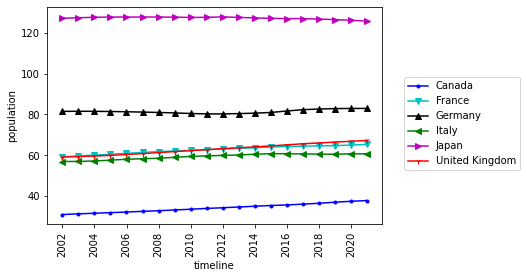

In [176]:
import datetime as dt
colors  = ["b", "c", "k", "g", "m", "r", "y"]
markers = [".", "v", "^", "<", ">", "1", "2"]

df_population_growth_rate = pd.read_csv("./csv/df_population_diff.tsv")
df_population_growth_rate["Date"] = pd.to_datetime(df_population_growth_rate["Date"])
df_population_growth_rate = df_population_growth_rate[(df_population_growth_rate['Date'] >= dt.datetime(2001,12,1)) & (df_population_growth_rate['Date'] <= dt.datetime(2020,12,31))]
# print(df_population_growth_rate)
for key, value, marker, color in zip(COUNTRIES.keys(), COUNTRIES.values(), markers, colors):
    plt.plot(df_population_growth_rate["Date"], 
             df_population_growth_rate[value], 
             c=color, 
             marker=marker,
             label=key)
plt.xlabel("timeline")
plt.ylabel("population")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 0.7), loc="upper left")
plt.show()


/var/folders/ht/jxpc68cx6flfn8khw5l066lm0000gn/T/ipykernel_17648/1637088084.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_gdp_rate = df_gdp_rate[(df_population_growth_rate['Date'] >= dt.datetime(2001,12,1)) & (df_gdp_rate['Date'] <= dt.datetime(2020,12,31))]


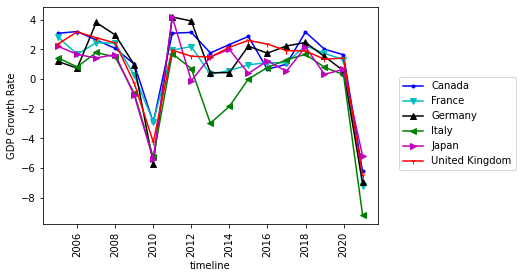

In [177]:
colors  = ["b", "c", "k", "g", "m", "r", "y"]
markers = [".", "v", "^", "<", ">", "1", "2"]
df_gdp_rate = df_gdp_rate[(df_population_growth_rate['Date'] >= dt.datetime(2001,12,1)) & (df_gdp_rate['Date'] <= dt.datetime(2020,12,31))]
df_gdp_rate["Date"] = pd.to_datetime(df_gdp_rate["Date"])
for key, value, marker, color in zip(COUNTRIES.keys(), COUNTRIES.values(), markers, colors):
    plt.plot(df_gdp_rate["Date"], 
             df_gdp_rate[value], 
             c=color, 
             marker=marker, 
             label=key)
plt.xlabel("timeline")
plt.ylabel("GDP Growth Rate")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 0.7), loc="upper left")
plt.show()

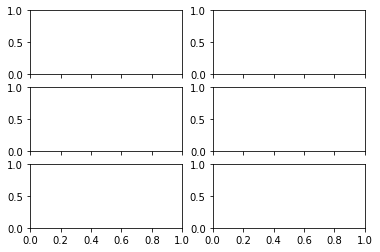

In [188]:
# 人口増加率とGDP成長率の散布図
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, sharex=True)
# ax1.scatter(X[:, 0], X[:, 1], c="black")
# ax1.grid()
# クラスタリング結果をプロット
# ax2.scatter(X[Y_km == 0, 0], X[Y_km == 0, 1], c="r", s=40, label="cluster 1")
# ax2.scatter(X[Y_km == 1, 0], X[Y_km == 1, 1], c="b", s=40, label="cluster 2")
# ax2.scatter(X[Y_km == 2, 0], X[Y_km == 2, 1], c="g", s=40, label="cluster 3")
# ax2.scatter(X[Y_km == 3, 0], X[Y_km == 3, 1], c="y", s=40, label="cluster 4")
# ax2.scatter(X[Y_km == 4, 0], X[Y_km == 4, 1], c="k", s=40, label="cluster 5")
# ax2.scatter(X[Y_km == 5, 0], X[Y_km == 5, 1], c="m", s=40, label="cluster 6")
# ax2.grid()
plt.show()